# Classification Decision tree.
#### We will use scikit-learn and cost complexity Pruning to built this Classification Tree, which uses continuous and categorical data from the UCI Machine Learning Respository to predict whether or not a patient has Heart Disease.


#### -> Missing Data 
##### Identifying Missing Data
##### Dealing with missing data

#### -> Formatting the Data for Decision Tree
##### Splitting data into Dependent and Independent Variables.
##### One-Hot_Encoding

#### -> Building a Preliminary Classification Tree

#### -> Optimizing the tree with Cost Complexity Pruning
##### Visualizing Alpha
##### Using Cross Validation to find the best value for Alpha

#### -> Building, Drawing, Interpreting and Evaluating the Final Classification Tree. 

### Import the Imporatant Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

### Import the Data.
##### Now we load in a dataset from the UCI Machine Learning Repository. Specifically, we are going to use the Heat Disease Dataset.
##### This dataset will allow us to predict if someone has heart disease based on their sex, age, blood pressure and a variety of other metrics.

In [3]:
df = pd.read_csv('processed.cleveland.data', header=None)



In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Rename the columns

In [5]:
# Change the column numbers to column names

df.columns =  ['age', 'sex', 'cp', 'restbp','chol', 'fbs', 'restecg','thelach',
              'exang', 'oldpeak','slope','ca','thal','hd']
# print the first 5 rows [including the column names]

df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thelach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


##### -age,
##### -sex,
##### -cp = chest pain,
##### -restbp = resting blood pressire (in mm Hg),
##### -chol = Serum cholestrol in mg/dl,
##### -fbs = fasting blood sugar,
##### -restecg = resting electrocardiographic results,
##### -thalanch = maximum heart rate achieved,
##### -exang = excercise induced angina,
##### -oldpeak = ST depression induced by exercise relative to rest,
##### -slope = the slope of the peak exercise St segment,
##### -ca = number of major vessels (0-3) colored by fluoroscopy,
##### -thal = this is short of thalium heart scan.,
##### -hd = diagnosis of heart disease, the predicted attribute.

In [6]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thelach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

# Data Cleaning
### Finding the missing values and correcting them.
 We see that their are almost all <b>float64</b>, however two columns, <b>ca</b> and <b>thal</b>, have the object type and one column, <b>hd</b> has int64.

In [7]:
df['ca'].unique() #checking for missing value.

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [8]:
df['thal'].unique()  # checking for missing value.

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [9]:
len(df.loc[(df['ca']=='?')
          |
          (df['thal']=='?')])

6

Since only 6 rows have missing values, let's have a look at them.

In [10]:
# print the rows that contain missing values
df.loc[(df['ca']=='?')
      |
      (df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thelach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [11]:
len(df)

303

So 6 of the 303 rows, or 2% contain missing values, since 303-6=297, and 297 is plenty of data to build a classification tree, we will remove the rows with the missing values, rather than try to impute their values.

We'll remove the rows with missing values by selecting all of the rows that do not contain question marks in either of the <b>ca</b> or <b>thal</b> columns.

In [14]:
# use loc[] to select all the rows that do not contain missing values
#  and save them in a new dataframe called "df_no_missing"

df_no_missing = df.loc[(df['ca']!='?')
                      &
                      (df['thal']!='?')]

# Here we neede to use and '&' instead of  or '|'

In [15]:
len(df_no_missing)

297

In [17]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [18]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

Now we can see that their are no missing values

# Format Data - Split the data into dependent and independent variables.
Splitting the data into two parts :- Columns of data that we will use to make classifications and columns of data that we want to predict.

In [19]:
#  Make a new copy of the columns used to make predictions
X = df_no_missing.drop('hd', axis=1).copy()  # alternatively : X = df_no_missing.iloc[:,:-1]
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thelach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [20]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

Now that we have created X, which has the data we want to use to make predictions, and y, which has the data we want to predict, we are ready to continue formatting X so that it is suitable for making a Decision Tree.

In [21]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thelach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

# One Hot-Encoding
Now, taking an example of column 'cp' where the data is present in categorical form represented in numeric format which represents - 
1. typical angina
2. atypical angina
3. non-anginal pain
4. asymptomatic

If we treated these values 1,2,3 and 4 like continuous data then we would assume that 4, which means 'asymptomatic' is more similar to 3, which means 'non-anginal' than it is to 1 or 2, which are other types of chest pain. That means the decision tree would be more likely to cluster the patients with 4s and 3s together than the patients with 4s and 1s together. In contrast, if we treat these numbers like categorical data, then we treat each one as a sparate category, that is no more or less similar to any of the categories. This, the likelihood of clustering patients with 4s with 3s is the same as clustering 4s with 1s, and theat approach is reasonable.

In [22]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [23]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thelach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [27]:
X_encoded = pd.get_dummies(X, columns=['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thelach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


As we can see, using one hot encoding we have created different columns from the categorical values 1,2,3 and 4 from <b> cp </b> column.

In [28]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [29]:
y_not_zero_index = y>0  # get the index for each non-zero value in y.
y[y_not_zero_index] = 1  # set each non-zero value in y to 1.
y.unique()               # verify that y only contains 0 and 1.

array([0, 1], dtype=int64)

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

# Create a decision tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

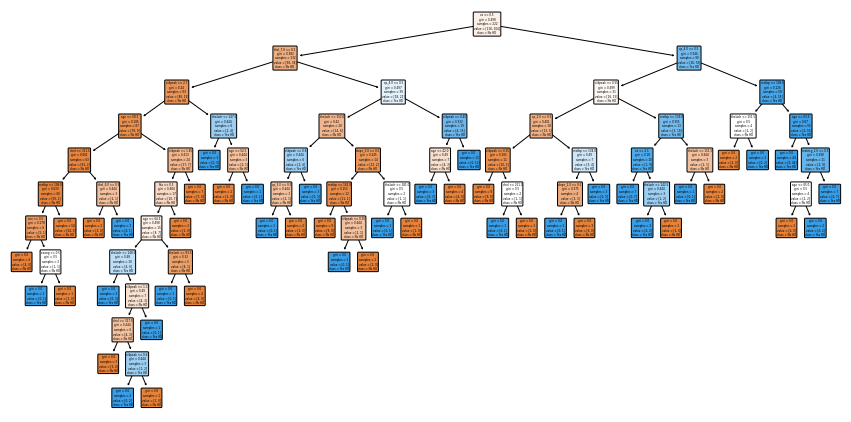

In [32]:
# Note we can plot the tree and its is huge
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, filled=True, rounded=True, class_names=["No HD","Yes HD"],
         feature_names=X_encoded.columns);

C:\Users\Hrishikesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


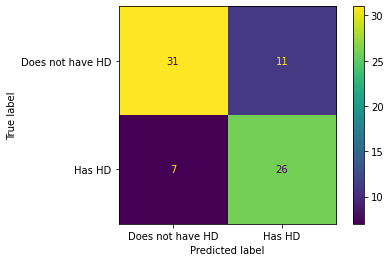

In [34]:
# plot_connfusion_matrix() will run the test data down the tree and draw
#  a confusion matrix.
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"])
plt.show()

In [37]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alphas
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = [] # create an array that we will put decisiom trees into


# now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

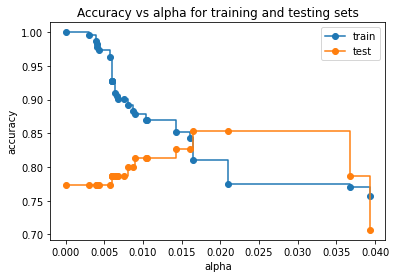

In [43]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores , marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

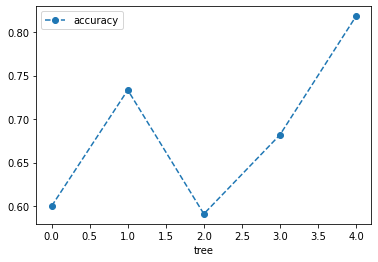

In [44]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0816) # create the tree with ccp_alpha=0.0816

# now use 5-fold cross validation create 5 different training and testing datasets that4
# are then used to train and test the tree
#  Note = We use 5 - fold because we don't have tons of data...

scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy':scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')
plt.show()

<AxesSubplot:xlabel='alpha'>

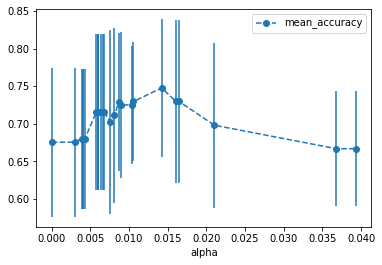

In [47]:
# create an array to store the results of each fold during cross validation
alpha_loop_values = []
 
# For each candidate value for alpha, we will run 5-fold cross validation.
# Then we will store the mean and standard deviation of the scores (the accuracy) for each call
# to cross_val_score in alpha_loop_values.....

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
# now we can draw a graph of the means and standard deviation of the scores
# for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')


In [48]:
alpha_results[(alpha_results['alpha']>0.014)
             &
             (alpha_results['alpha']<0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [49]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha']>0.014)
                               &
                               (alpha_results['alpha']<0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [50]:
# convert ideal_ccp_alpha from a series to a float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

In [51]:
#  build and train a new decision tree, only this time use the optimal value for alpha
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)


C:\Users\Hrishikesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


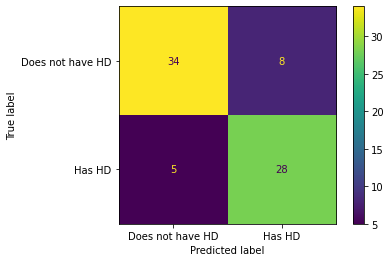

In [53]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=["Does not have HD",
                                                                     "Has HD"])
plt.show()

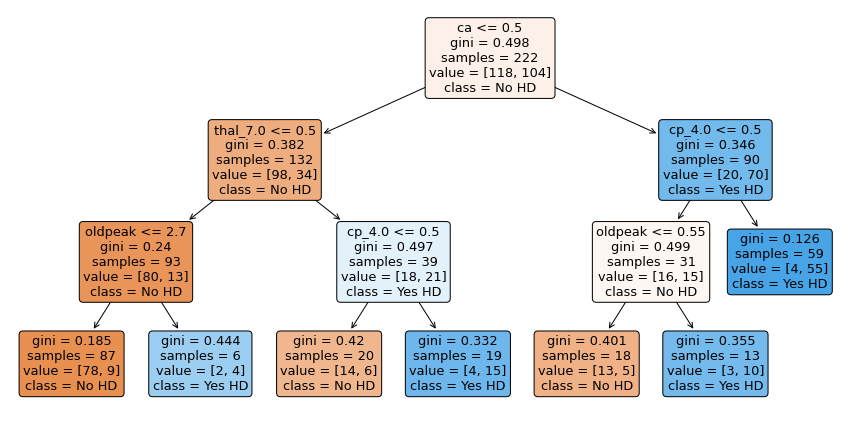

In [54]:
# plotting the pruned tree from that big tree above
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,
         filled=True,
         rounded=True,
         class_names=["No HD", "Yes HD"],
         feature_names = X_encoded.columns);
# the darkr the colour, lower is the gini impurity.